# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset load

In [2]:
df = pd.read_csv('train.csv')
df =df[['Pclass','Sex','Age','Survived']]
df.head(2)

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1


In [3]:
df.shape

(891, 4)

In [4]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
Survived      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Survived  891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


# Visualize data

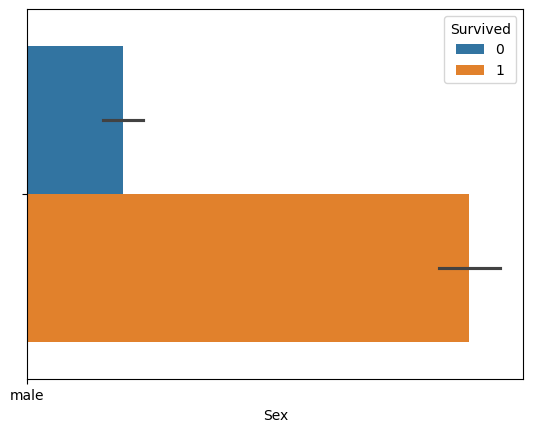

In [6]:
sns.barplot(data=df, x='Sex', hue='Survived')
plt.show()

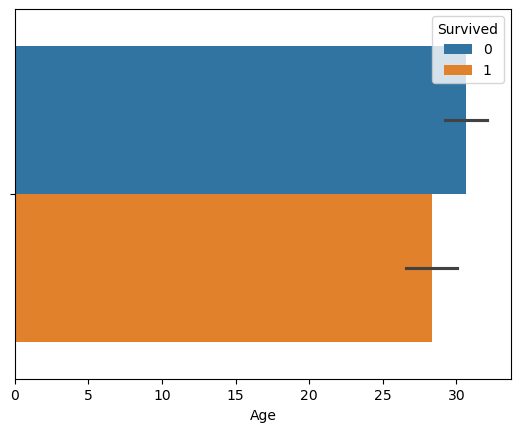

In [7]:
sns.barplot(data=df, x='Age', hue='Survived')
plt.show()

# Extract column and Train test split

In [8]:
X = df.iloc[:,:3]
y = df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 3), (179, 3), (712,), (179,))

In [10]:
X_train

,Pclass,Sex,Age
331,1,male,45.5
733,2,male,23.0
382,3,male,32.0
704,3,male,26.0
813,3,female,6.0
...,...,...,...
106,3,female,21.0
270,1,male,NaN
860,3,male,41.0
435,1,female,14.0


In [11]:
X_test

,Pclass,Sex,Age
709,3,male,NaN
439,2,male,31.0
840,3,male,20.0
720,2,female,6.0
39,3,female,14.0
...,...,...,...
433,3,male,17.0
773,3,male,NaN
25,3,female,38.0
84,2,female,17.0


In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
CT = ColumnTransformer([
    ('age', SimpleImputer(), ['Age']),
    ('sex', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['Sex'])
], remainder='passthrough')

In [13]:
X_train = CT.fit_transform(X_train)
X_test = CT.transform(X_test)

# Model train

In [14]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy score ',accuracy_score(y_test, y_pred))

Accuracy score  0.7821229050279329


In [16]:
# Calculate the score using cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.7972028 , 0.81118881, 0.75352113, 0.75352113, 0.82394366])

# Predict

In [15]:
user_input = pd.DataFrame([[2,'male',31.0]], columns=['Pclass', 'Sex', 'Age'])

# Apply the same transformations as training
CT = CT.transform(user_input)

# Predict survival
prediction = NB.predict(CT)[0]

# Map result
result = "Survived" if prediction == 1 else "Did not survive"
print(f"Prediction: The passenger would have {result}")

Prediction: The passenger would have Did not survive


In [ ]:
# Save